In [15]:
import pandas as pd
df = pd.read_csv('BostonHousing.csv')

In [16]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
x = df.drop('medv',axis=1)
y = df['medv']

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
model = Sequential ([
    Input(shape=(x.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='linear'),
])
model.compile(
    optimizer='adam',
    loss='mse'
)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=1,
    monitor='val_loss',
    verbose=1,
    restore_best_weights=True
)

In [24]:
history=model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 604.3824 - val_loss: 496.5284
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 523.2666 - val_loss: 456.0151
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 522.0479 - val_loss: 399.0599
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 444.3028 - val_loss: 320.1879
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 337.9033 - val_loss: 227.4102
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 274.2729 - val_loss: 141.3360
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 151.1314 - val_loss: 87.4972
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 103.0945 - val_loss: 61.3102
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.9947 - val_loss: 46.7041
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 49.6108 - val_loss: 37.6548
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 52.9300 - val_loss: 31.8961
Epoch 12/100
13/13 ━━━━━━━

In [25]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
print(r2(y_test,y_pred))
print(mae(y_test,y_pred))
print(mse(y_test,y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
0.8320338055177455
2.3568182178572115
12.31759648442628


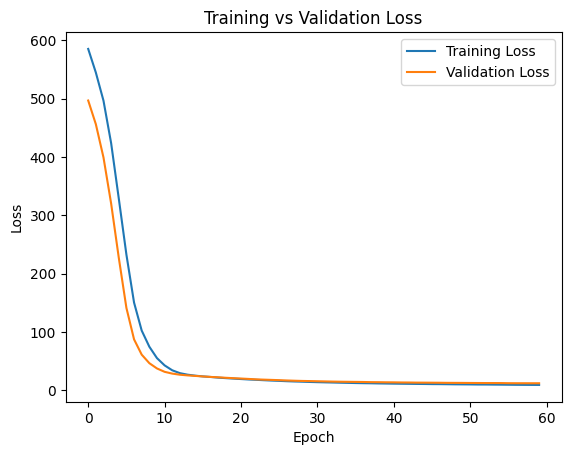

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()